# Import libraries

In [1]:
! pip install tensorflow
! pip install opencv-python
! pip install pandas
! pip install numpy 
! pip install matplotlib
! pip install pickle-mixin

In [2]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import shuffle
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cv2

from sklearn.model_selection import train_test_split

In [3]:
#Please Uncomment this code and give access on the followup window to link your google drive
#Only Use this code while running on Google Collab
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

# Reading data

In [4]:
import os
BASE_DIR = 'C:\\Users\\samar\\Downloads\\archive (2)\\shapes' #Please change this path according to data Source Folder
shapes = os.listdir(BASE_DIR)
shapes

['circle', 'square', 'star', 'triangle']

In [5]:
data = []
target = []
for i, shape in enumerate(shapes):
    path = os.path.join(BASE_DIR, shape)
    for filename in os.listdir(path):
        image = cv2.imread(os.path.join(path , filename),0)
        image = image.reshape(200,200,1)
        data.append(image)
        target.append(i)

# Preprocessing

In [6]:
data = np.array(data)
target = np.array(target)
target = to_categorical(target)

In [7]:
data.shape, target.shape

((14970, 200, 200, 1), (14970, 4))

In [8]:
X_full, X_test, y_full, y_test = train_test_split(data, target, stratify=target, random_state= 42, test_size = 0.25)
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, stratify=y_full, random_state= 42, test_size = 0.15)

Let's check some images to see if everything is alright

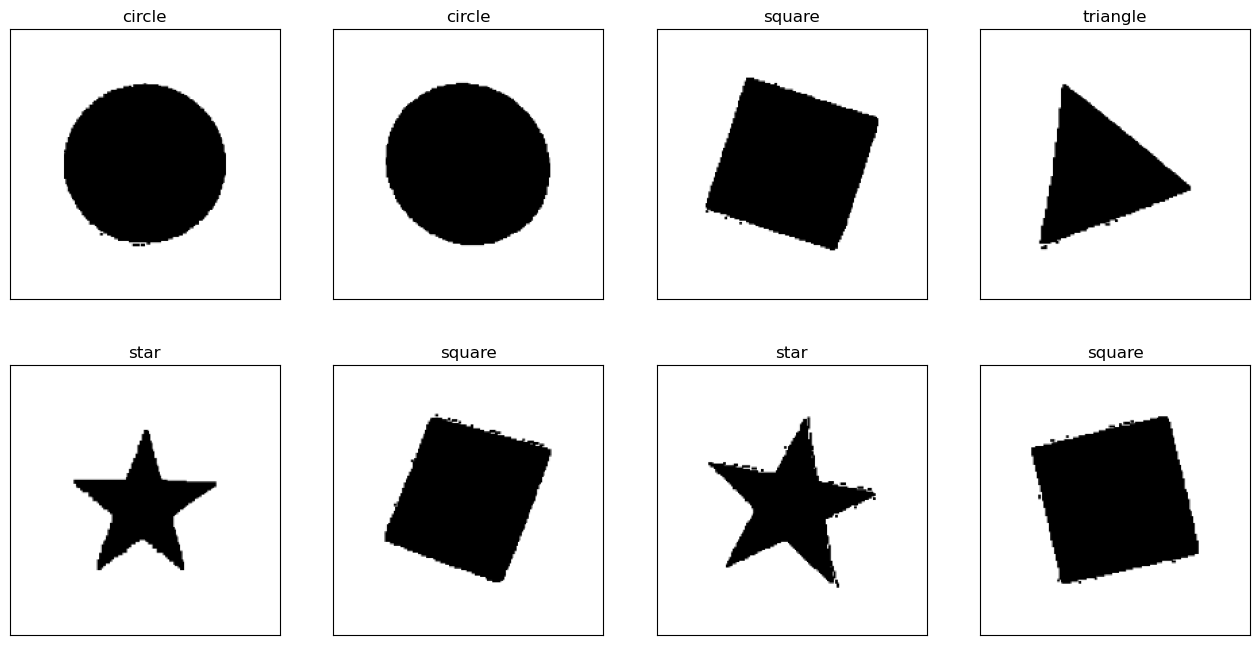

In [9]:
def show_images(count, X, y):
    fig, axes =plt.subplots(count//4,4, figsize = (16, count))
    for i, ind in enumerate(np.random.randint(0, X.shape[0] , count)):
        ax = axes[i//4][i%4] 
        ax.imshow(X[ind],cmap = 'gray')
        ax.title.set_text(shapes[np.argmax(y[ind])])
        ax.set_xticks([]) 
        ax.set_yticks([])
show_images(8, X_train, y_train)

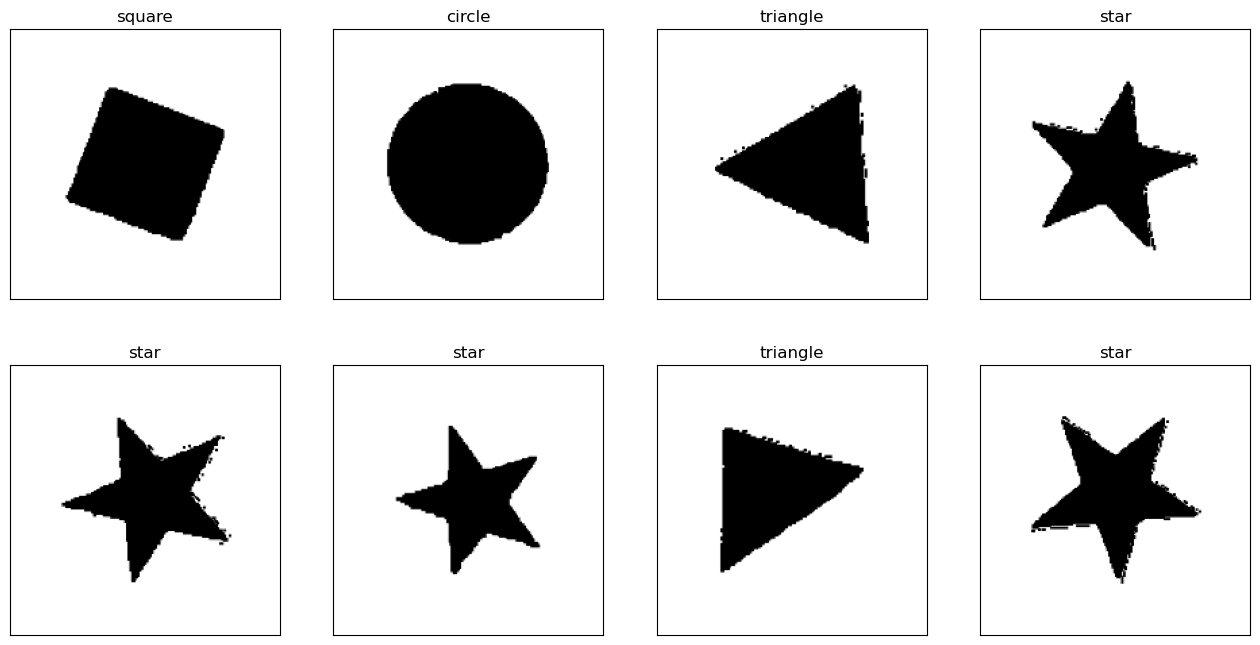

In [10]:
show_images(8, X_val, y_val)

In [11]:
train_datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale = 1.0/255,
    horizontal_flip=True,
    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale = 1.0/255)

In [12]:
X_test = X_test/255.0
X_train = X_train/255.0
X_val = X_val/255.0

# Modelling

In [13]:
model = Sequential([
    Conv2D(32, (3,3),strides = 2 ,input_shape = (200,200,1), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(4, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 99, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 32)        0

In [14]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 5, validation_data = (X_val, y_val))

Epoch 1/5
299/299 [==============================] - 31s 97ms/step - loss: 0.4351 - accuracy: 0.8014 - val_loss: 7.0053e-04 - val_accuracy: 1.0000
Epoch 2/5
299/299 [==============================] - 30s 101ms/step - loss: 0.0391 - accuracy: 0.9890 - val_loss: 3.8359e-06 - val_accuracy: 1.0000
Epoch 3/5
299/299 [==============================] - 30s 101ms/step - loss: 0.0180 - accuracy: 0.9949 - val_loss: 6.4077e-06 - val_accuracy: 1.0000
Epoch 4/5
299/299 [==============================] - 31s 105ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 1.0301e-07 - val_accuracy: 1.0000
Epoch 5/5
299/299 [==============================] - 32s 105ms/step - loss: 0.0070 - accuracy: 0.9973 - val_loss: 1.9153e-06 - val_accuracy: 1.0000


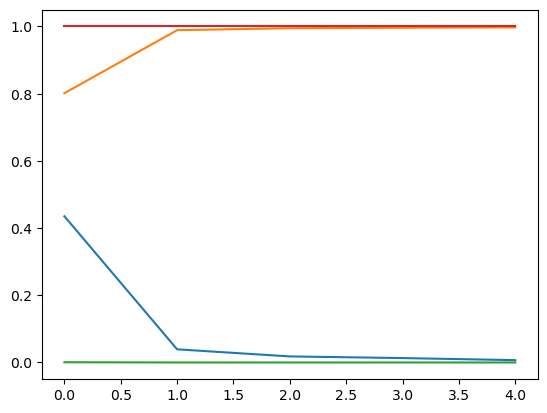

In [15]:
metrics = pd.DataFrame(history.history)
plt.plot(metrics)

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy is {}%'.format(accuracy*100))

117/117 [==============================] - 4s 33ms/step - loss: 1.7971e-06 - accuracy: 1.0000
Accuracy is 100.0%


In [17]:
def show_images_predicted(count, X, y):
    fig, axes =plt.subplots(count//4,4, figsize = (16, count))
    for i, ind in enumerate(np.random.randint(0, X.shape[0] , count)):
        ax = axes[i//4][i%4] 
        ax.imshow(X[ind],cmap = 'gray')
        res=""
        if y[ind][0]==1:
            res+="circle"
        if y[ind][1]==1:
            res+="square"
        if y[ind][2]==1:
            res="star"
        if y[ind][3]==1:
            res="triangle"
        ax.title.set_text(res)
        ax.set_xticks([]) 
        ax.set_yticks([])

117/117 [==============================] - 4s 31ms/step


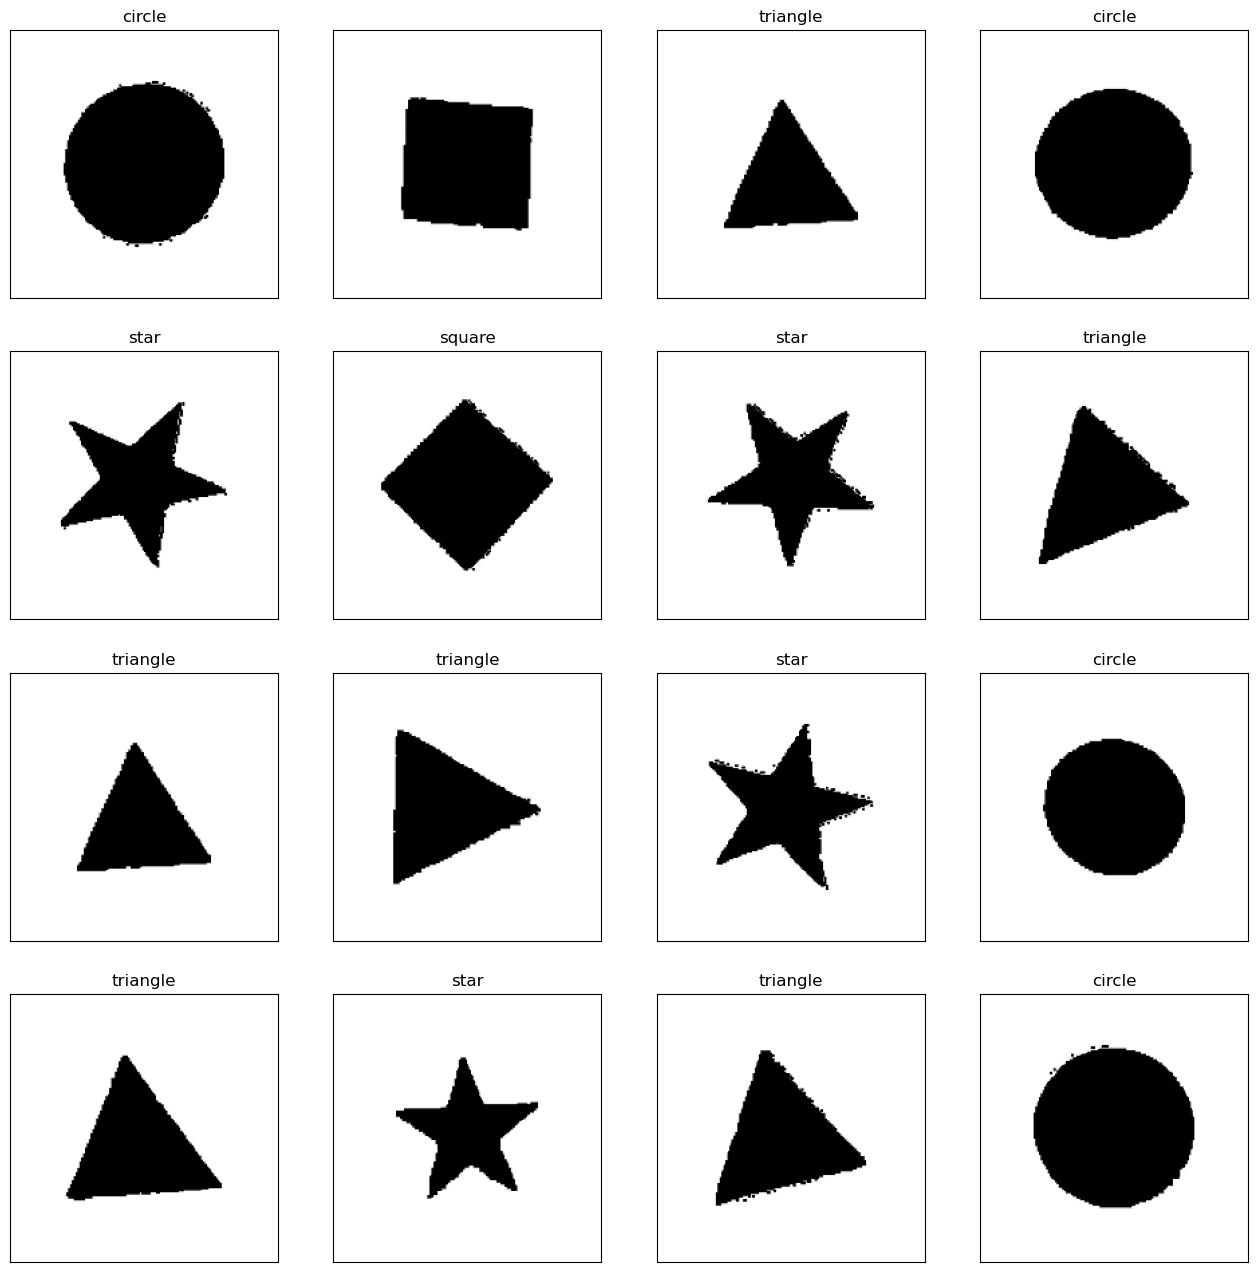

In [18]:
preds = model.predict(X_test)
show_images_predicted(16,X_test, preds)

(3765, 200, 200, 1)
118/118 [==============================] - 3s 28ms/step


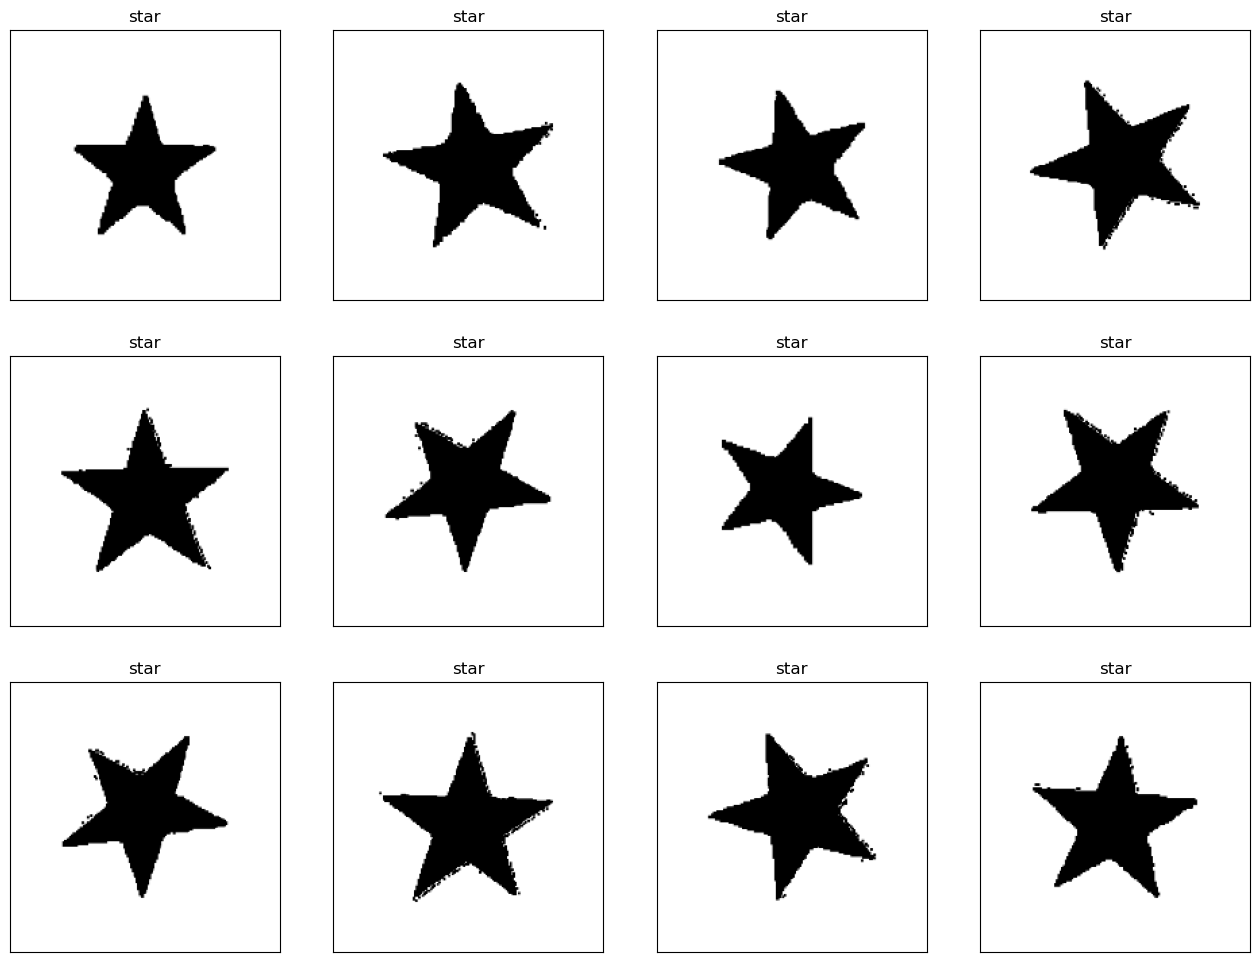

In [19]:
#This code will NOT run on Collab
BASE_DIR = r'C:\Users\samar\Downloads\archive (2)\shapes\star'#Please change this path according to data Source Folder

shapes = os.listdir(BASE_DIR)

data = []

count=12
for filename in shapes:
    image_path = os.path.join(BASE_DIR, filename)
    image = cv2.imread(image_path, 0) 
    image = image.reshape(200, 200, 1)
    data.append(image)

data = np.array(data)
print(data.shape)
data = data/255.0

preds = model.predict(data)

show_images_predicted(count, data, preds)

In [20]:
import cv2
import time
import numpy as np

data1 = []

def predict_with_model(image_data):
    image_data = np.array(image_data)
    y = model.predict(image_data)
    res=""
    if y[-1][0]==1:
        res+="circle"
    if y[-1][1]==1:
        res+="square"
    if y[-1][2]==1:
        res="star"
    if y[-1][3]==1:
        res="triangle"
    cv2.putText(img_gray, res, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Open the camera capture
cap = cv2.VideoCapture(0)

# Set the desired frame width and height
frame_width = 200
frame_height = 200
cap.set(3, frame_width)  # 3 corresponds to frame width
cap.set(4, frame_height)  # 4 corresponds to frame height

while True:
    success, img = cap.read()
    
    # Ensure the captured frame is not None
    if img is not None:
        # Convert the image to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Resize the image to 200x200 pixels
        img_gray = cv2.resize(img_gray, (frame_width, frame_height))
        
        # Expand the dimensions to match the desired shape (1, 200, 200, 1)
        img_gray = np.expand_dims(img_gray, axis=-1)
        
        # Append the image to the data1 list
        data1.append(img_gray)
    
        if len(data1) > 0:
            preds = predict_with_model(data1)
            print(preds)
        
        # Display the image
        cv2.imshow("Image", img_gray[:, :, 0])
    
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit the loop
        break

# Release the camera
cap.release()
cv2.destroyAllWindows()




1/1 [==============================] - 0s 93ms/step
None
1/1 [==============================] - 0s 33ms/step
None
1/1 [==============================] - 0s 33ms/step
None
1/1 [==============================] - 0s 26ms/step
None
1/1 [==============================] - 0s 32ms/step
None
1/1 [==============================] - 0s 23ms/step
None
1/1 [==============================] - 0s 33ms/step
None
1/1 [==============================] - 0s 33ms/step
None
1/1 [==============================] - 0s 32ms/step
None
1/1 [==============================] - 0s 34ms/step
None
1/1 [==============================] - 0s 41ms/step
None
1/1 [==============================] - 0s 35ms/step
None
1/1 [==============================] - 0s 33ms/step
None
1/1 [==============================] - 0s 34ms/step
None
1/1 [==============================] - 0s 33ms/step
None
1/1 [==============================] - 0s 33ms/step
None
1/1 [==============================] - 0s 40ms/step
None
1/1 [==========================